In [2]:
import os
import cv2
import cv2.aruco as aruco
import numpy as np
from matplotlib import pyplot as plt
import imageio

ARUCO_PARAMETERS = aruco.DetectorParameters_create()
ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_4X4_50)

## Truth center image find id=0 aruco marker

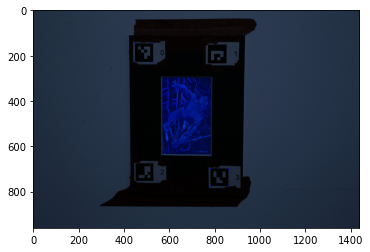

True

In [12]:
image = cv2.imread("./images/spiderman_spiral_truth.png")
corners, ids, rejectedImgPoints = aruco.detectMarkers(image, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
index_of_0 = np.where(ids.flatten() == 0)[0][0]
index_of_3 = np.where(ids.flatten() == 3)[0][0]

image_truth = image.copy()
origins = np.concatenate((corners[index_of_0][0], corners[index_of_3][0]))
for (x, y) in origins:
    cv2.circle(image_truth, (x, y), radius=1, color=(0, 0, 255), thickness=2)

plt.imshow(image_truth)
plt.show()
cv2.imwrite("./image_truth.png", image_truth)

## Rendered image from NeRF detect aruco marker id=0

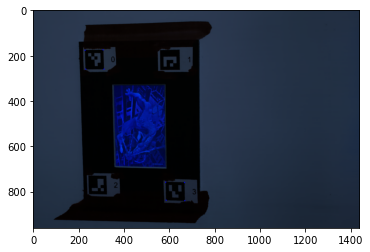

In [14]:
rendered_img = cv2.imread("../../nerf_tf2/logs/spiderman_spiral/renderonly_path_050001/000.png")
manual = rendered_img.copy()

corners, ids, rejectedImgPoints = aruco.detectMarkers(rendered_img, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
index_of_0 = np.where(ids.flatten() == 0)[0][0]
index_of_3 = np.where(ids.flatten() == 3)[0][0]

interest = np.concatenate((corners[index_of_0][0], corners[index_of_3][0]))
for (x, y) in interest:
    cv2.circle(manual, (x, y), radius=1, color=(0, 0, 255), thickness=2)
cv2.imwrite("./manual.png", manual)
plt.imshow(manual)
plt.show()

## Apply Homography

<Figure size 640x480 with 0 Axes>

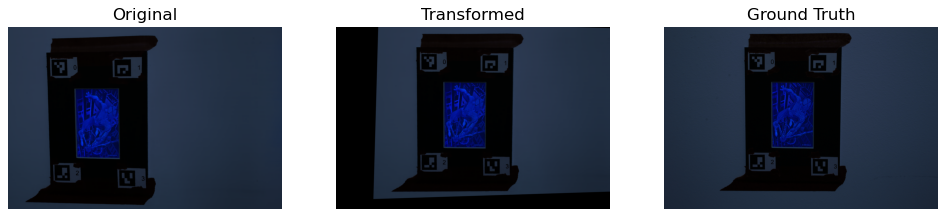

In [16]:
# homography
# reference: https://learnopencv.com/homography-examples-using-opencv-python-c/
rendered_img = cv2.imread("../../nerf_tf2/logs/spiderman_spiral/renderonly_path_050001/000.png")
manual = rendered_img.copy()
resized = cv2.imread("./images/spiderman_spiral_truth.png")

points_of_interest = np.array(interest)
projection = np.array(origins)
h, status = cv2.findHomography(points_of_interest, projection)
im_dst = cv2.warpPerspective(manual, h, (resized.shape[1], resized.shape[0]))
cv2.imwrite("./tf_img_warp.png", im_dst) 

plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,3, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(rendered_img)
ax[0].set_axis_off()
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(im_dst)
ax[1].set_axis_off()
ax[2].set_title(f'Ground Truth', fontsize = 15)
ax[2].imshow(resized)
ax[2].set_axis_off()

In [17]:
# truth image center
image = cv2.imread("./images/spiderman_spiral_truth.png")
corners, ids, rejectedImgPoints = aruco.detectMarkers(image, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
index_of_0 = np.where(ids.flatten() == 0)[0][0]
index_of_3 = np.where(ids.flatten() == 3)[0][0]

image_truth = image.copy()
origins = np.concatenate((corners[index_of_0][0], corners[index_of_3][0]))

frames = []
img_dir = '../../nerf_tf2/logs/spiderman_spiral/renderonly_path_050001/'
files = os.listdir(img_dir)
files.sort()
idx = 0
for f in files:
    if f.endswith('.png') == False: continue
    im = cv2.imread(img_dir + f)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(im, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
    index_of_0 = np.where(ids.flatten() == 0)[0][0]
    index_of_3 = np.where(ids.flatten() == 3)[0][0]
    interest = np.concatenate((corners[index_of_0][0], corners[index_of_3][0]))

    points_of_interest = np.array(interest)
    projection = np.array(origins)
    h, status = cv2.findHomography(points_of_interest, projection)
    im_dst = cv2.warpPerspective(im, h, (image_truth.shape[1], image_truth.shape[0]))
    cv2.imwrite("./save/" + str(idx) + ".png", im_dst)
    idx += 1
    

In [3]:
frames = []
img_dir = './save/'
files = os.listdir(img_dir)
files.sort()
for img in files:
    if img.endswith('.png') == False: continue
    frames.append(imageio.imread(img_dir + img))
    
print('done, saving')
f = './temp.mp4'
imageio.mimwrite(f, frames, fps=30, quality=8)

/home/jiwon/miniconda3/envs/nerf_tf2_test/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys


done, saving


In [4]:
images = []
img_dir = './save/'
files = os.listdir(img_dir)
files.sort()
for filename in files:
    images.append(imageio.imread(img_dir + filename))
imageio.mimsave('./temp.gif', images)

/home/jiwon/miniconda3/envs/nerf_tf2_test/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  
